In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from PIL import Image

In [5]:
label_index = {"dry": 0, "normal": 1, "oily": 2}

def create_df(base):
    dd = {"images": [], "labels": []}
    for label_name in os.listdir(base):
        label_path = os.path.join(base, label_name)
        if os.path.isdir(label_path):  
            for img_name in os.listdir(label_path):
                img_path = os.path.join(label_path, img_name)
                dd["images"].append(img_path)
                dd["labels"].append(label_index[label_name])
    return pd.DataFrame(dd)

In [7]:
base_path = "Skin_Type_Classification\Oily-Dry-Skin_Faces_only/train"
train_df = create_df(base_path)

In [9]:
train_df.head()

,images,labels
0,Skin_Type_Classification\Oily-Dry-Skin_Faces_o...,0
1,Skin_Type_Classification\Oily-Dry-Skin_Faces_o...,0
2,Skin_Type_Classification\Oily-Dry-Skin_Faces_o...,0
3,Skin_Type_Classification\Oily-Dry-Skin_Faces_o...,0
4,Skin_Type_Classification\Oily-Dry-Skin_Faces_o...,0


In [13]:
image_path = train_df['images'].iloc[0]
image = Image.open(image_path)
image_dimensions = image.size
print("Image Size: ", image_dimensions)

Image Size:  (650, 650)


In [14]:
def check_image_resolutions(df):
    image_sizes = []
    
    for index, row in df.iterrows():
        img = Image.open(row['images'])
        image_sizes.append(img.size)
    
    size_df = pd.DataFrame(image_sizes, columns=['Width', 'Height'])
    
    size_counts = size_df.value_counts().reset_index(name='Count')
    print(size_counts)
    
    unique_sizes = size_df.drop_duplicates()
    
    if len(unique_sizes) == 1:
        print('All images have the same resolution:', unique_sizes.iloc[0].to_dict())
    else:
        print('Images have varying resolutions.')
    
    return size_counts

image_resolutions = check_image_resolutions(train_df)

   Width  Height  Count
0    650     650   2756
All images have the same resolution: {'Width': 650, 'Height': 650}


In [15]:
train_df.groupby('labels').describe()

images                                                               
        count unique                                                top freq
labels                                                                      
0         652    652  Skin_Type_Classification\Oily-Dry-Skin_Faces_o...    1
1        1104   1104  Skin_Type_Classification\Oily-Dry-Skin_Faces_o...    1
2        1000   1000  Skin_Type_Classification\Oily-Dry-Skin_Faces_o...    1

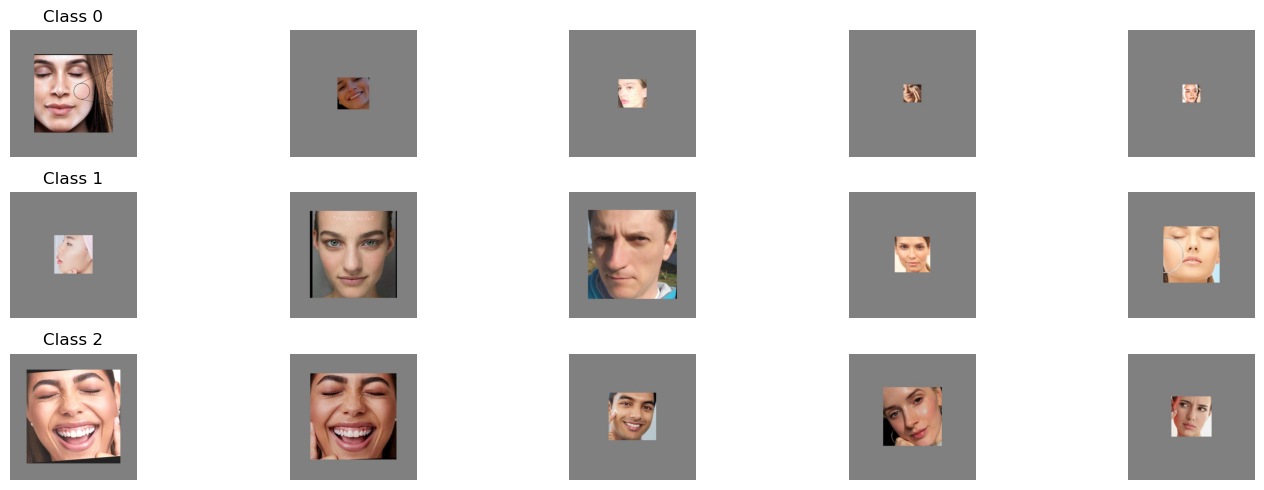

In [16]:


def plot_example_images(df, num_classes=3, num_images_per_class=5):
    fig, axes = plt.subplots(num_classes, num_images_per_class, figsize=(15, 5))
    
    for class_id in range(num_classes):
        class_images = df[df['labels'] == class_id].sample(num_images_per_class)
        for i, (index, row) in enumerate(class_images.iterrows()):
            img = Image.open(row['images'])
            axes[class_id, i].imshow(img)
            axes[class_id, i].axis('off')
            if i == 0:
                axes[class_id, i].set_title(f'Class {class_id}')
    
    plt.tight_layout()
    plt.show()

plot_example_images(train_df)


In [17]:
def compute_mean_image(df, label):
    label_df = df[df['labels'] == label]
    images = []
    
    for index, row in label_df.iterrows():
        img = Image.open(row['images'])
        img_array = np.array(img, dtype=np.float32)
        images.append(img_array)
    
    stacked_images = np.stack(images)
    mean_image = np.mean(stacked_images, axis=0)
    
    return mean_image.astype(np.uint8)

def plot_mean_images(mean_images, labels):
    num_labels = len(labels)
    fig, axes = plt.subplots(1, num_labels, figsize=(15, 5))
    
    for i, label in enumerate(labels):
        axes[i].imshow(mean_images[label])
        axes[i].set_title(f'Label {label}')
        axes[i].axis('off')
    
    plt.show()

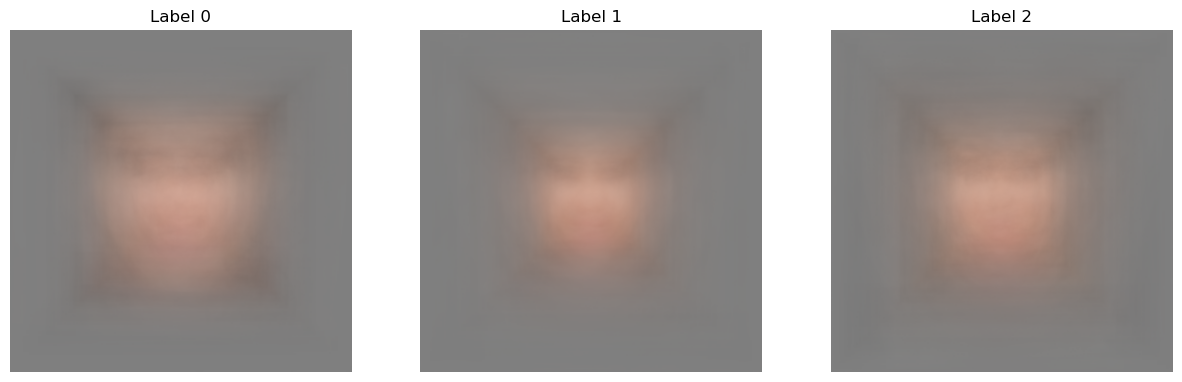

In [18]:
unique_labels = train_df['labels'].unique()
mean_images = {label: compute_mean_image(train_df, label) for label in unique_labels}
plot_mean_images(mean_images, unique_labels)

In [19]:
def normalize(df):
    images = []
    
    for index, row in df.iterrows():
        img = Image.open(row['images']).convert('RGB')
        # Convert image to numpy array and normalize by dividing by 255
        img_array = np.array(img, dtype=np.float32) / 255.0
        images.append(img_array)

    return images

normalized_images = normalize(train_df)

# Inspect the first normalized image
first_image = normalized_images[0]
print(f'Shape of the first normalized image: {first_image.shape}')
print(f'First normalized image array:\n{first_image}')

Shape of the first normalized image: (650, 650, 3)
First normalized image array:
[[[0.5019608 0.5019608 0.5019608]
  [0.5019608 0.5019608 0.5019608]
  [0.5019608 0.5019608 0.5019608]
  ...
  [0.5019608 0.5019608 0.5019608]
  [0.5019608 0.5019608 0.5019608]
  [0.5019608 0.5019608 0.5019608]]

 [[0.5019608 0.5019608 0.5019608]
  [0.5019608 0.5019608 0.5019608]
  [0.5019608 0.5019608 0.5019608]
  ...
  [0.5019608 0.5019608 0.5019608]
  [0.5019608 0.5019608 0.5019608]
  [0.5019608 0.5019608 0.5019608]]

 [[0.5019608 0.5019608 0.5019608]
  [0.5019608 0.5019608 0.5019608]
  [0.5019608 0.5019608 0.5019608]
  ...
  [0.5019608 0.5019608 0.5019608]
  [0.5019608 0.5019608 0.5019608]
  [0.5019608 0.5019608 0.5019608]]

 ...

 [[0.5019608 0.5019608 0.5019608]
  [0.5019608 0.5019608 0.5019608]
  [0.5019608 0.5019608 0.5019608]
  ...
  [0.5019608 0.5019608 0.5019608]
  [0.5019608 0.5019608 0.5019608]
  [0.5019608 0.5019608 0.5019608]]

 [[0.5019608 0.5019608 0.5019608]
  [0.5019608 0.5019608 0.501960

In [20]:
normalized_data = [{'image': img, 'label': label} for img, label in zip(normalized_images, train_df['labels'])]
normalized_df = pd.DataFrame(normalized_data)
normalized_df.head()

,image,label
0,"[[[0.5019608, 0.5019608, 0.5019608], [0.501960...",0
1,"[[[0.5019608, 0.5019608, 0.5019608], [0.501960...",0
2,"[[[0.5019608, 0.5019608, 0.5019608], [0.501960...",0
3,"[[[0.5019608, 0.5019608, 0.5019608], [0.501960...",0
4,"[[[0.5019608, 0.5019608, 0.5019608], [0.501960...",0
